In [75]:
import numpy as np
import pandas as pd
import yaml
import seaborn
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Part 1 - Filter Categories

In [80]:
with open("./cat_food.txt", 'r') as fi:
    food = fi.read().splitlines()       
# Example: 
# target_cat = ['Restaurants', 'Food'] # to be continued...
target_cat = food

In [81]:
df = pd.read_pickle("./UC01_df_uc_open.p")
print df.shape
df = df[df.categories.apply(lambda x: not set(x).isdisjoint(set(target_cat)))]
print df.shape

(729, 16)
(334, 16)


For now, start from here...

## Part 2 - Build Attribute Table

In [83]:
# load data
# df = pd.read_pickle("./UC01_df_uc_open.p") 

df.index = df.business_id.values
att = df.attributes

# extract attributes
a = att.apply(lambda x: yaml.load('['+','.join(x)+']'))

In [84]:
# find full-size attribute set
# if subattribute exists, use '_' to connect them.
att_all = set()
for row in a:
    for i in row:
        if not isinstance(i.values()[0], dict):
            att_all.add(i.keys()[0])
        else:
            prefix = i.keys()[0]
            for k in i.values()[0].iterkeys():
                suffix = k
                temp = prefix + '_' + suffix
                att_all.add(temp)
len(att_all)

73

In [86]:
# create full-size attribute table
# index = business_id
# col = att_all
tab = pd.DataFrame(columns=att_all, index=df.index)

for ind in tab.index:
    for j in a[ind]:
        if not isinstance(j.values()[0], dict):
            tab.loc[ind, j.keys()[0]] = j.values()[0]
        else:
            prefix = j.keys()[0]
            for k, v in j.values()[0].iteritems():
                suffix = k
                temp = prefix + '_' + suffix
                tab.loc[ind, temp] = v

## Part 3 - Missing Values 
(missing, not False)

In [88]:
print tab.shape[0]
tab.count(axis=0).sort_values(ascending=False)[1:20]
# 729 * 50% = 360 -> 3 attributes -> RestaurantsPriceRange2 / BusinessParking / BikeParking 

334


RestaurantsPriceRange2       330
BusinessParking_lot          304
BusinessParking_valet        304
BusinessParking_validated    304
BusinessParking_garage       304
BusinessParking_street       304
BikeParking                  296
RestaurantsTakeOut           292
OutdoorSeating               271
RestaurantsGoodForGroups     261
RestaurantsReservations      255
Alcohol                      254
RestaurantsDelivery          253
HasTV                        250
Ambience_touristy            248
Ambience_trendy              248
Ambience_upscale             248
Ambience_casual              248
Ambience_hipster             248
dtype: int64

In [89]:
print tab.shape[1]
tab.count(axis=1).sort_values(ascending=False)[1:20]

73


L2c-qKZWumCmOCR-dqBLrg    58
jeTfL2kCyBtmFGSrSQHqVw    58
UUsS7SrTQQ2AvvpslfrvFA    57
-Jhlh8Scjy669NdtCfKSSg    57
D6SCh4BwNb52wZIqXdS4JQ    57
ODURDhURWmZr6b--O4nt3w    56
7B-suS0RHxqxZBBfVfiPLA    56
dn9lwYUxmhs_mLKPu7L25Q    56
S_9OaE_RBWBIXnUKvxJKsQ    56
iZleRh4SOtf4GquA5L8WXw    56
uvVOuCbo4_5z_J5WJVG4QQ    56
RQxLNvAra_MUUPHdhukilA    55
F1qPjasn0R6-j8sa6iYNmA    55
vqEtZ7CtNB9G8WMzjwJA2g    55
JbnNk6do3aHF3Kr1bX4HzQ    55
mklo4H47YWK7f18YXTCEoA    55
HbK6IfznbVToEaKVC0WcSg    55
_TWp4gqGF7tQUGloTClcNg    55
PmVxbit6HDDsEUS-j9aDfg    54
dtype: int64

{u'bodies': [<matplotlib.collections.PolyCollection at 0x1102a1590>],
 u'cbars': <matplotlib.collections.LineCollection at 0x11107fe50>,
 u'cmaxes': <matplotlib.collections.LineCollection at 0x11037e350>,
 u'cmins': <matplotlib.collections.LineCollection at 0x11005b7d0>}

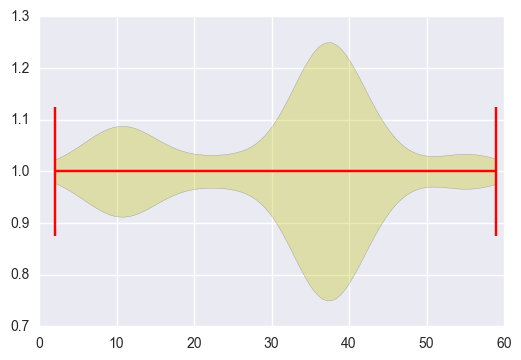

In [90]:
pl.violinplot(tab.count(axis=1).values,vert=False)

## Part 4 - Join & output

In [91]:
# sort column by alphabeta
tab.columns = tab.columns.sort_values()
# shape
print df.shape, tab.shape
# join two table
df_with_attribute = df.join(tab)

(334, 16) (334, 73)


In [94]:
df_with_attribute.to_pickle("./UC02_df_uc_food_att.p")


## Summary

Label:
* stars

Filter:
* city - u & c
* is_open == 1
* categories <- target category list

Transform:
* attributes

<br/><br/>

Useful Attribute:
* From _attributes_
* review_count
* hours - not preprocess
* lat/long, address, postal_code
* (maybe) name - text?

Not Useful:
* state - all identical
* type - all identical
* neighborhood - all nan

<br/><br/>

Idea from last discussion:
* make full use of remaining categories